In [33]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

## 4.1 Adicionando uma coluna 'dia da semana' ao nosso dataframe
Antes, devemos carregar os dados.

<Axes: xlabel='Date'>

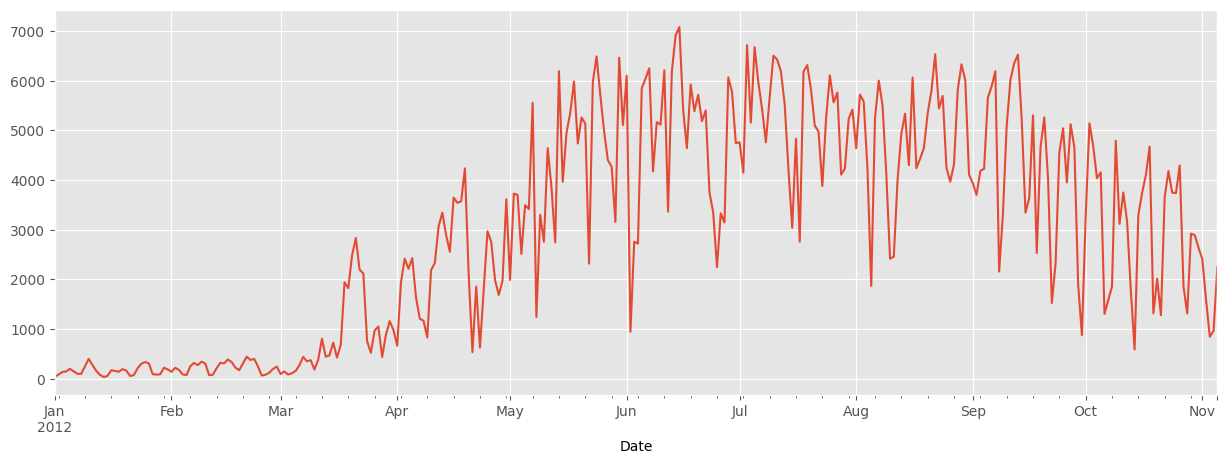

In [34]:
bikes = pd.read_csv('pandas-cookbook-master/data/bikes.csv',sep=';',encoding='latin1',parse_dates=['Date'],dayfirst=True,index_col='Date')
bikes['Berri 1'].plot(kind='line')

Criando uma dataframe com apenas a ciclovia Berri.

In [44]:
berri_bikes = bikes[['Berri 1']].copy()

In [46]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Usaremos o método index para adicionar os dias da semana, mas antes ele vai ser executado sozinho.

In [48]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

Podemos usar o método .day para converter as datas do index em dias do mês.

In [49]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

Porém queremos os dias da semana,logo:

In [50]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

Estes são os dias da semana, onde 0 é segunda-feira. gora que sabemos como obter o dia da semana, podemos adicioná-lo como uma coluna em nosso dataframe assim:

In [53]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 4.2 Somando os ciclistas por dia da semana
Os dataframes têm um `.groupby()` método semelhante ao SQL groupby

Neste caso, `berri_bikes.groupby('weekday').aggregate(sum)` significa "Agrupar as linhas por dia da semana e somar todos os valores com o mesmo dia da semana".

In [54]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


Mudando 0,1,2,... para Segunda, terça, ...

In [57]:
weekday_counts.index = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
weekday_counts

,Berri 1
Segunda,134298
Terça,135305
Quarta,152972
Quinta,160131
Sexta,141771
Sábado,101578
Domingo,99310


<Axes: >

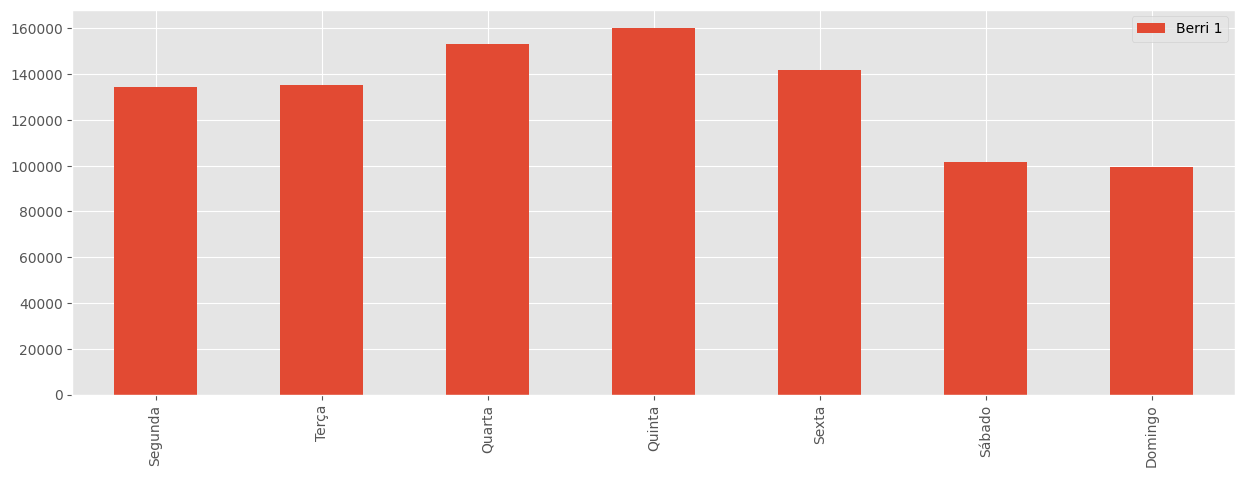

In [58]:
weekday_counts.plot(kind='bar')

## 4.3 Juntando tudo
Vamos juntar tudo isso, para provar como é fácil. 6 linhas de pandas mágicos!

Se você quiser brincar, tente mudar `sum` para `max`, `numpy.median` qualquer outra função de sua preferência.

<Axes: >

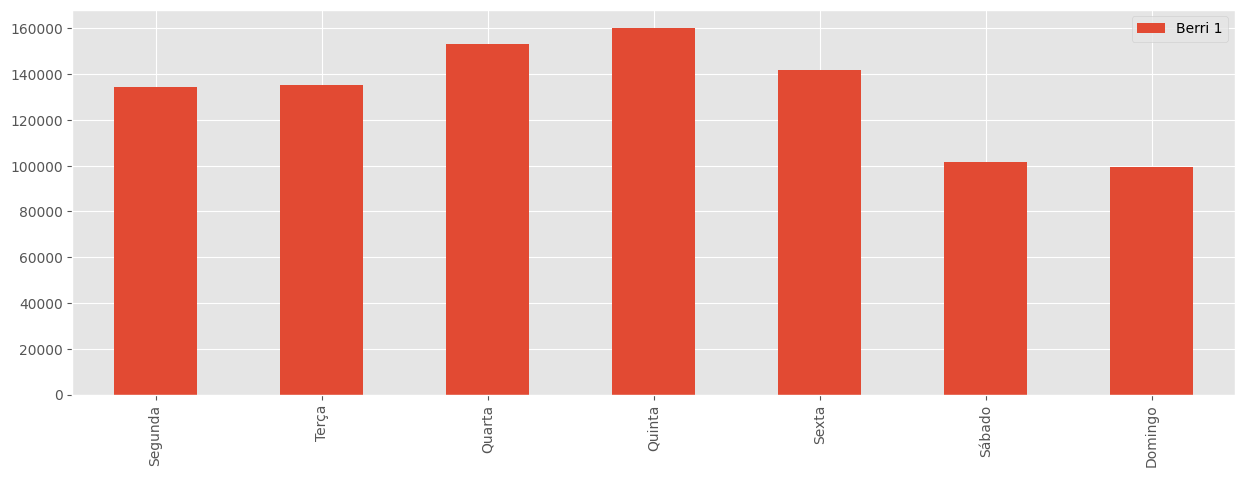

In [59]:
bikes = pd.read_csv('pandas-cookbook-master/data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Adicionando a coluna weekday
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Adicionando o número de ciclistas para os dias da semana e plotando!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
weekday_counts.plot(kind='bar')